1. Load some Data in the form of Tweets (Already have the text from Tweets)

2. Seperate Tweets into dates: I mean date of publishing

3. For all the Tweets Published in a given day;

A. Remove the URLS

Calculate the pairwise Cosine Similarity . Save the data in a csv file.

Calculate the pairwise Jaccrad Similarity. Save the data in a csv file.

Calculate the TF_IDF Similarity. Save the data in a csv file.

B. Break the Tweet into Tokens

Remove stop words

Count the Frequency of top 10 occuring keyword for every day. Save the data into a csv file

Use Kmeans clustering to cluster word tokens...Save number of Clusters and Words in

Visualize Clusters and the words that are in that clusters in the form of word bubble

# 1. Load some Data in the form of Tweets (Already have the text from Tweets)

In [1]:
import csv
bodyText=[]
with open('realFinalNHB.csv',"rt") as f:
    reader = csv.reader(f)
    for row in reader:
#         print(row)
        bodyText.append(row)
bodyText.remove(['', 'author', 'publicationTime', 'bodyText'])
print(bodyText[0])
# lasim=[]
# with open('pairwise_jaccard_similiarity.csv',"rt") as f:
#     reader = csv.reader(f)
#     for row in reader:
#         lasim.append(row)
# print(len(lasim))

['0', 'id:twitter.com:2209799083', '10/02/2016 10:30', "RT @350Australia: Adani Group's Aust #coal mining troubles far from over. \nhttps://t.co/KO1rp5LlQs https://t.co/iKRHZphy7Q"]


# 2. Seperate Tweets into dates: I mean date of publishing

# 3. For all the Tweets Published in a given day;

In [2]:
publicationDate={}
with open('realFinalNHB.csv',"rt") as f:
    reader = csv.reader(f)
    for row in reader:
#         print(row)
      if row[2] != 'publicationTime':
        publicationDate[row[2].split(' ')[0]]=[]
print(publicationDate)
with open('realFinalNHB.csv',"rt") as f:
    reader = csv.reader(f)
    for row in reader:
        if row[2] != 'publicationTime' and row[3] != 'bodyText' and row[2]!= '' and row[3]!='':
            publicationDate[row[2].split(' ')[0]].append(row[3])
print(publicationDate['10/02/2016'][0])


{'10/02/2016': [], '11/02/2016': [], '12/02/2016': [], '13/02/2016': [], '14/02/2016': [], '15/02/2016': [], '16/02/2016': [], '17/02/2016': [], '18/02/2016': [], '19/02/2016': [], '20/02/2016': [], '21/02/2016': [], '22/02/2016': [], '23/02/2016': [], '24/02/2016': [], '25/02/2016': [], '26/02/2016': [], '27/02/2016': [], '28/02/2016': [], '29/02/2016': [], '1/03/2016': [], '2/03/2016': [], '3/03/2016': [], '4/03/2016': [], '5/03/2016': [], '6/03/2016': [], '7/03/2016': [], '8/03/2016': [], '': [], '9/03/2016': [], '10/03/2016': [], '11/03/2016': [], '15/03/2016': [], '16/03/2016': []}
RT @350Australia: Adani Group's Aust #coal mining troubles far from over. 
https://t.co/KO1rp5LlQs https://t.co/iKRHZphy7Q


# A. Remove the URLS

In [3]:
import re
with open('realFinalNHB.csv',"rt") as f:
    reader = csv.reader(f)
    for row in reader:
#         print(row)
      if row[2] != 'publicationTime':
        publicationDate[row[2].split(' ')[0]]=[]
with open('realFinalNHB.csv',"rt") as f:
    reader = csv.reader(f)
    for row in reader:
        if row[2] != 'publicationTime' and row[3] != 'bodyText' and row[2]!= '' and row[3]!='':
            publicationDate[row[2].split(' ')[0]].append(re.sub(r'http\S+', '', row[3]))
print(publicationDate['10/02/2016'][0])

RT @350Australia: Adani Group's Aust #coal mining troubles far from over. 
 


# Calculate the pairwise Cosine Similarity . Save the data in a csv file.

In [8]:
tokenize = lambda doc: doc.lower().split(" ")
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
nltk.download()
tfidf_vectorizer = TfidfVectorizer(tokenizer=nltk.word_tokenize)
tfidf_matrix = tfidf_vectorizer.fit_transform(publicationDate['10/02/2016'])
print(len(tfidf_matrix.toarray()))

import math
def cosine_similarity(vector1, vector2):
    dot_product = sum(p*q for p,q in zip(vector1, vector2))
    magnitude = math.sqrt(sum([val**2 for val in vector1])) * math.sqrt(sum([val**2 for val in vector2]))
    if not magnitude:
        return 0
    return dot_product/magnitude

import itertools
panda=[]
for i in range(tfidf_matrix.shape[0]):
    panda.append(i)
# print(tfidf_matrix.shape)
import numpy as np
myData=[['pairwise','word1','word2','cosine_similiarity']]
peki=0
def to_str(var):
    return str(list(np.reshape(np.asarray(var), (1, np.size(var)))[0]))[1:-1]
for each in itertools.permutations(panda,2):
#     peki+=1
#     print(peki)

    similarities_sparse = cosine_similarity(tfidf_matrix.toarray()[each[0]],tfidf_matrix.toarray()[each[1]])
    myData.append(['('+str(each[0])+','+str(each[1])+')',publicationDate['10/02/2016'][each[0]],publicationDate['10/02/2016'][each[1]],to_str(similarities_sparse)])

myFile = open('pairwise_cosine_similiarity.csv', 'w', newline='')  
with myFile:  
    writer = csv.writer(myFile)
    writer.writerows(myData)
print("done")




showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml
263
done


# Calculate the pairwise Jaccrad Similarity. Save the data in a csv file.

In [9]:
def jaccard_similarity(query, document):
    intersection = set(query).intersection(set(document))
    union = set(query).union(set(document))
    return len(intersection)/len(union)
import nltk
# from nltk.tokenize import word_tokenize
tokenized_documents = [list(filter(None, nltk.word_tokenize(d))) for d in publicationDate['10/02/2016']]
pelepasan=[]
for i in range(len(tokenized_documents)):
    pelepasan.append(i)
peki=0
myData=[['pairwise','word1','word2','jaccard_similiarity']]
for each in itertools.permutations(pelepasan,2):
#     peki+=1
#     print(peki)
    jaccard_similiarities = jaccard_similarity(tokenized_documents[each[0]],tokenized_documents[each[1]])
    myData.append(['('+str(each[0])+','+str(each[1])+')',publicationDate['10/02/2016'][each[0]],publicationDate['10/02/2016'][each[1]],to_str(jaccard_similiarities)])

myFile = open('pairwise_jaccard_similiarity.csv', 'w', newline='')  
with myFile:  
    writer = csv.writer(myFile)
    writer.writerows(myData)
print("done")


done


# Calculate the TF_IDF Similarity. Save the data in a csv file.

In [10]:
def to_str(var):
    import numpy as np
    return str(list(np.reshape(np.asarray(var), (1, np.size(var)))[0]))[1:-1]
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
nltk.download()
sklearn_tfidf = TfidfVectorizer(norm='l2',min_df=0, use_idf=True, smooth_idf=False, sublinear_tf=True, tokenizer=nltk.word_tokenize)
sklearn_representation = sklearn_tfidf.fit_transform(publicationDate['10/02/2016'])
# print(publicationDate['10/02/2016'][260])
feature_names = sklearn_tfidf.get_feature_names()
# doc = 260
tokenized_documents = [list(filter(None, nltk.word_tokenize(d))) for d in publicationDate['10/02/2016']]
myData=[['word','tf-idf']]
lasagna=0
# pelepasan=[]
for doc in range(len(tokenized_documents)):
#     print(doc)
#     pelepasan.append(i)
    feature_index = sklearn_representation[doc,:].nonzero()[1]
    tfidf_scores = zip(feature_index, [sklearn_representation[doc, x] for x in feature_index])
    dict={}
    for w, s in [(feature_names[i], s) for (i, s) in tfidf_scores]:
        if w != '':
            dict[w]=s
    myData.append([publicationDate['10/02/2016'][doc],to_str(dict)])
#     print( w, s)
# print(dict)
myFile = open('TF_IDF_similiarity.csv', 'w', newline='')  
with myFile:  
    writer = csv.writer(myFile)
    writer.writerows(myData)
print("done")

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml
done


# B. Break the Tweet into Tokens

In [7]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'[a-zA-Z]+')
tokenized_documents = [list(filter(None, tokenizer.tokenize(d))) for d in publicationDate['10/02/2016']]
tokenized_documents

[['RT',
  'Australia',
  'Adani',
  'Group',
  's',
  'Aust',
  'coal',
  'mining',
  'troubles',
  'far',
  'from',
  'over'],
 ['RT',
  'avivaimhof',
  'Poor',
  'old',
  'coal',
  'Now',
  'even',
  'Vietnam',
  'is',
  'moving',
  'away',
  'from',
  'it'],
 ['RT',
  'market',
  'forces',
  'Funds',
  'have',
  'burned',
  'billions',
  'of',
  'dollars',
  'of',
  'our',
  'super',
  'on',
  'dirty',
  'fossilfuels',
  'investment',
  'coal'],
 ['RT',
  'avivaimhof',
  'Vietnam',
  'PM',
  'Announces',
  'Retreat',
  'from',
  'Coal',
  'Power',
  'Another',
  'blow',
  'to',
  'global',
  'coal',
  'industry',
  'zdaniel',
  'mik'],
 ['RT',
  'Australia',
  'Adani',
  'Group',
  's',
  'Aust',
  'coal',
  'mining',
  'troubles',
  'far',
  'from',
  'over'],
 ['RT',
  'QldGreens',
  'How',
  'times',
  'change',
  'Published',
  'on',
  'QLD',
  'Labor',
  's',
  'Facebook',
  'on',
  'Jan',
  'coal',
  'Adani',
  'GreatBarrierReef',
  'qldpol',
  'auspol'],
 ['RT',
  'LockTheGat

# Remove stop words

In [50]:
# from nltk.corpus import stopwords
# # ...
# import nltk
# filtered_words = [word for word in tokenized_documents if word not in stopwords.words('english')]
# filtered_words
import nltk
# nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
super_filter=[]
for j in range(len(tokenized_documents)):
    filtered_sentence = []
 
    for w in tokenized_documents[j]:
        if w not in stop_words:
            filtered_sentence.append(w)
    super_filter.append(filtered_sentence)
# print('it' in stop_words)
# super_filter
salam= [' '.join(x) for x in super_filter]
salam

[['RT',
  'Australia',
  'Adani',
  'Group',
  'Aust',
  'coal',
  'mining',
  'troubles',
  'far'],
 ['RT',
  'avivaimhof',
  'Poor',
  'old',
  'coal',
  'Now',
  'even',
  'Vietnam',
  'moving',
  'away'],
 ['RT',
  'market',
  'forces',
  'Funds',
  'burned',
  'billions',
  'dollars',
  'super',
  'dirty',
  'fossilfuels',
  'investment',
  'coal'],
 ['RT',
  'avivaimhof',
  'Vietnam',
  'PM',
  'Announces',
  'Retreat',
  'Coal',
  'Power',
  'Another',
  'blow',
  'global',
  'coal',
  'industry',
  'zdaniel',
  'mik'],
 ['RT',
  'Australia',
  'Adani',
  'Group',
  'Aust',
  'coal',
  'mining',
  'troubles',
  'far'],
 ['RT',
  'QldGreens',
  'How',
  'times',
  'change',
  'Published',
  'QLD',
  'Labor',
  'Facebook',
  'Jan',
  'coal',
  'Adani',
  'GreatBarrierReef',
  'qldpol',
  'auspol'],
 ['RT',
  'LockTheGate',
  'Ex',
  'ICAC',
  'commish',
  'lays',
  'line',
  'need',
  'overhaul',
  'coal',
  'laws',
  'across',
  'Oz',
  'stop',
  'corruption'],
 ['Brisbane',
  'f

# Count the Frequency of top 10 occuring keyword for every day. Save the data into a csv file

In [15]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'[a-zA-Z]+')
def term_frequency(term, tokenized_document):
    return tokenized_document.count(term)
def countTop(key):
    juiko={}
    import nltk
    tokenized_documents = [list(filter(None, tokenizer.tokenize(d))) for d in publicationDate[key]]
    from nltk.corpus import stopwords
    stop_words = set(stopwords.words('english'))
    super_filter=[]
    for j in range(len(tokenized_documents)):
            filtered_sentence = []
 
            for w in tokenized_documents[j]:
              if w not in stop_words:
                filtered_sentence.append(w)
            super_filter.append(filtered_sentence)
    for doci in range(len(super_filter)):
        for docin in range(len(super_filter[doci])):
            if super_filter[doci][docin] not in juiko:
                juiko[super_filter[doci][docin]]=term_frequency(super_filter[doci][docin],super_filter[doci])
            else:
                juiko[super_filter[doci][docin]]+=term_frequency(super_filter[doci][docin],super_filter[doci])
    lasi=sorted(juiko.items(), key=lambda kv: kv[1], reverse=True)
    
    sania=[]
    for san in range(10):
        sania.append(lasi[san])
    
    return [key,sania]
saju=[['day','top_ten_words']]

for key, value in publicationDate.items():
    if key!='':
        saju.append(countTop(key))
# print(saju)
myFile = open('top_ten_words.csv', 'w', newline='')  
with myFile:  
    writer = csv.writer(myFile)
    writer.writerows(saju)
print("done")

done


# Use Kmeans clustering to cluster word tokens...Save number of Clusters and Words in Visualize Clusters and the words that are in that clusters in the form of word bubble

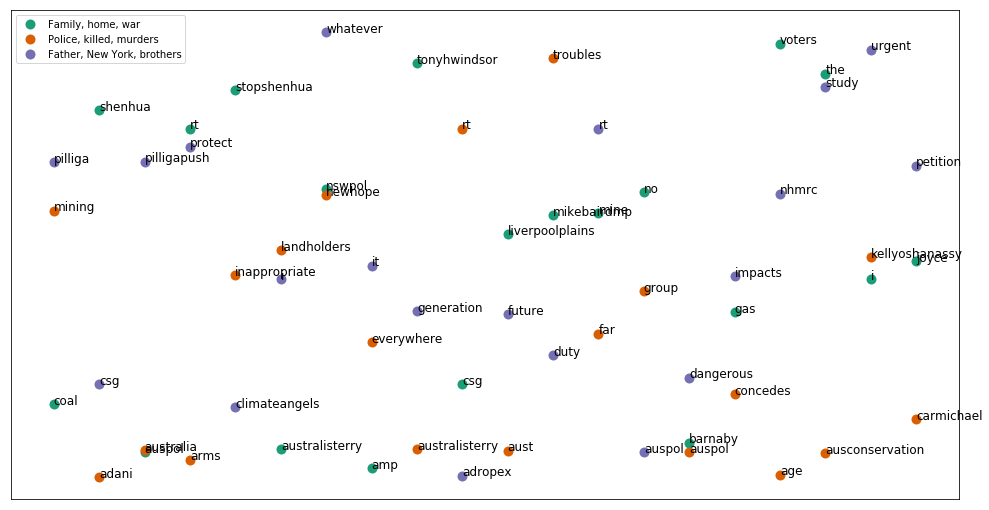

In [83]:
import os  # for os.path.basename


from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
# nltk.download()
import pandas as pd

from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'[a-zA-Z]+')
tfidf_vectorizer = TfidfVectorizer(tokenizer=tokenizer.tokenize)
tfidf_matrix = tfidf_vectorizer.fit_transform(salam) 
terms = tfidf_vectorizer.get_feature_names()

from sklearn.cluster import KMeans

num_clusters = 3

km = KMeans(n_clusters=num_clusters)

km.fit(tfidf_matrix)

clusters = km.labels_.tolist()

model = KMeans(n_clusters=num_clusters, init='k-means++', max_iter=100, n_init=1)
model.fit(tfidf_matrix)
 
# print(clusters)
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = tfidf_vectorizer.get_feature_names()
cipok=[]
for i in range(num_clusters):
#     print("Cluster %d:" % i)
    candid=[]
    for ind in order_centroids[i]:
        candid.append([ind,terms[ind]])
#         print(' %s' % terms[ind]),
    cipok.append(candid)
# print(len(clusters))
# titles=[]
# # super_filter[0]
# for z in range(len(clusters)):
# #     print(yogik)
    
#     for j in range(len(super_filter[z])):
        
# #         print(super_filter[z][j]+str(len(super_filter[z][j])))
#         try:
#             index = cipok[clusters[z]].index(super_filter[z][j].lower()) 
#         except ValueError:
#             waatokna[z].remove(super_filter[z][j])
            
#     titles.append(waatokna[z])
# # cipok
# # print(titles)
# campai=[' '.join(x) for x in titles]
# campai
# print(len(cipok))
    
import matplotlib.pyplot as plt
import matplotlib as mpl

# from sklearn.manifold import MDS

# MDS()

# mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)
# from sklearn.metrics.pairwise import cosine_similarity
# dist = 1 - cosine_similarity(tfidf_matrix)

# pos = mds.fit_transform(dist)  # shape (n_components, n_samples)

# xs, ys = pos[:, 0], pos[:, 1]
cluster_colors = {0: '#1b9e77', 1: '#d95f02', 2: '#7570b3'}

#set up cluster names using a dict
cluster_names = {0: 'Cluster 1', 
                 1: 'Cluster 2', 
                 2: 'Cluster 3'
                 }

%matplotlib inline 

fig, ax = plt.subplots(figsize=(17,9))
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
# for name, group in group:
#     ax.plot(group.x, group.y, marker='o', linestyle='', ms=10,
#             label=cluster_names[name], color=cluster_colors[name], 
#             mec='none')
#     ax.set_aspect('auto')
#     ax.tick_params(\
#         axis= 'x',          # changes apply to the x-axis
#         which='both',      # both major and minor ticks are affected
#         bottom='off',      # ticks along the bottom edge are off
#         top='off',         # ticks along the top edge are off
#         labelbottom='off')
#     ax.tick_params(\
#         axis= 'y',         # changes apply to the y-axis
#         which='both',      # both major and minor ticks are affected
#         left='off',      # ticks along the bottom edge are off
#         top='off',         # ticks along the top edge are off
#         labelleft='off')
for ko in range(len(cipok)):
    for ki in range(10):  
        ax.plot(ki, cipok[ko][ki][0], marker='o', linestyle='', ms=10,
            label=cluster_names[ko], color=cluster_colors[ko], 
            mec='none')
        ax.set_aspect('auto')
        ax.tick_params(\
           axis= 'x',          # changes apply to the x-axis
           which='both',      # both major and minor ticks are affected
           bottom='off',      # ticks along the bottom edge are off
           top='off',         # ticks along the top edge are off
           labelbottom='off')
        ax.tick_params(\
           axis= 'y',         # changes apply to the y-axis
           which='both',      # both major and minor ticks are affected
           left='off',      # ticks along the bottom edge are off
           top='off',         # ticks along the top edge are off
           labelleft='off')
    
ax.legend(numpoints=1)  #show legend with only 1 point

#add label in x,y position with the label as the film title
# for i in range(len(df)):
#     ax.text(df.loc[i]['x'], df.loc[i]['y'], df.loc[i]['title'], size=10)
for i in range(len(cipok)):
    for b in range(10):
#         print(cipok[i][b][0])
        ax.text(b,cipok[i][b][0] , cipok[i][b][1], size=12)

    
    
plt.show() #show the plot

In [80]:
['lam','cam'].index('slam')

ValueError: 'slam' is not in list